In [1]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = np.load("processed_data.npz")
df = pd.read_csv("data/test_state_action_reward_df.csv")

In [3]:
import gym_sepsis

In [4]:
from gym_sepsis.envs.sepsis_env import SepsisEnv

In [6]:
x = data['x_test']
y = data['y_test']

In [7]:
columns = ['ALBUMIN', 'ANION GAP', 'BANDS', 'BICARBONATE',
       'BILIRUBIN', 'BUN', 'CHLORIDE', 'CREATININE', 'DiasBP', 'Glucose',
       'GLUCOSE', 'HeartRate', 'HEMATOCRIT', 'HEMOGLOBIN', 'INR', 'LACTATE',
       'MeanBP', 'PaCO2', 'PLATELET', 'POTASSIUM', 'PT', 'PTT', 'RespRate',
       'SODIUM', 'SpO2', 'SysBP', 'TempC', 'WBC', 'age', 'is_male',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
       'weight', 'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'elixhauser_hospital',
       'blood_culture_positive']


In [8]:
sepsis_env = SepsisEnv()

In [9]:
# sns.set(style="white")
from matplotlib.pyplot import figure


def plot(column, start, end, sepsis_env):
    simulated_states = np.zeros(shape=(end - start, x[start].shape[0] - 1))
    simulated_states[0] = np.squeeze(sepsis_env.reset(starting_state=x[start][:-1]))
    doctor_actions = x[start:end][:,46]
    for i in range(1, end - start):
        simulated_states[i] = np.squeeze(sepsis_env.step(doctor_actions[i])[0])
    figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(x[start:end][:,columns.index(column)], label="truth")
    plt.plot(simulated_states[:,columns.index(column)], label="predicted")
    
    plt.legend(["truth", "predicted"])
    plt.title(column)
    plt.show()

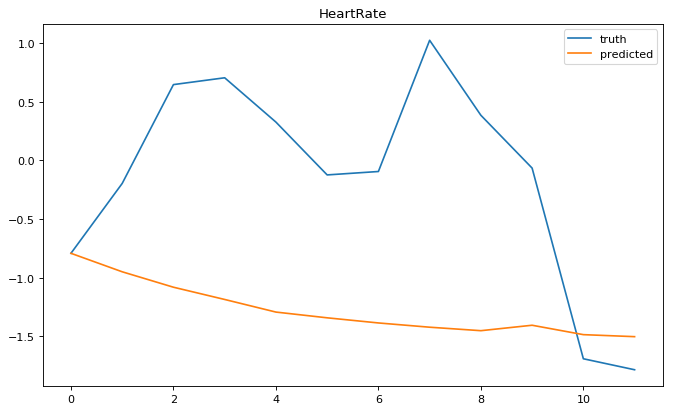

In [10]:
plot("HeartRate" ,19428, 19440, sepsis_env)

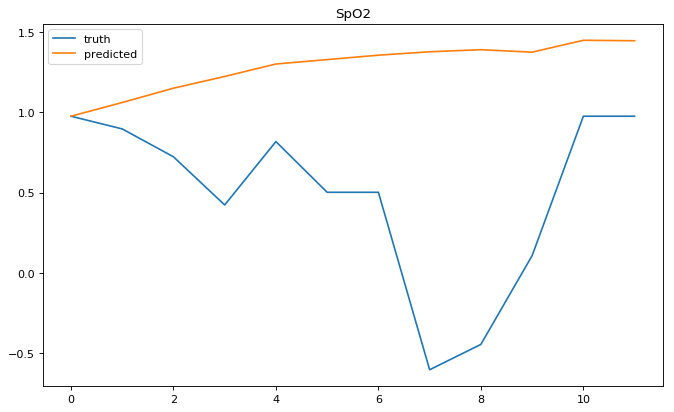

In [11]:
plot("SpO2" ,19428, 19440, sepsis_env)

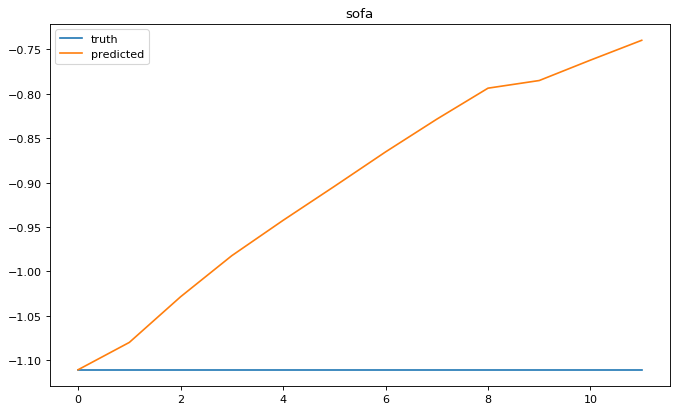

In [12]:
plot("sofa" ,19428, 19440, sepsis_env)

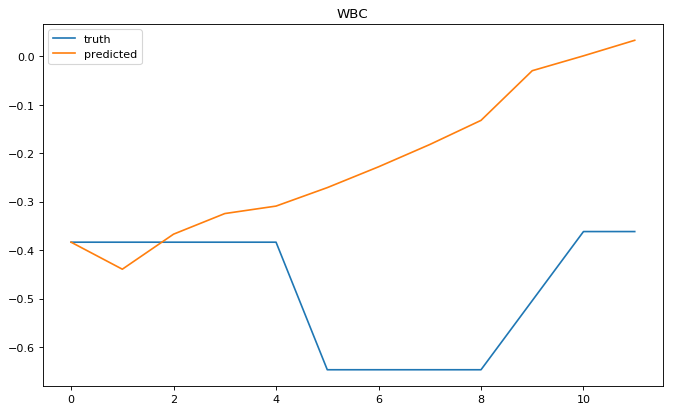

In [13]:
plot("WBC" ,19428, 19440, sepsis_env)